video link : https://photos.app.goo.gl/qpysmeazQ7JyNCj67

# Customer Churn

### Problem Statement
The goal of this project is to develop a classification model that predicts whether a customer
will churn. Using demographic data (such as gender, senior citizen status, and tenure), along
with information about the services they use (such as internet service, phone service, and
online security), we will attempt to build a model that helps the company identify customers
who are at a high risk of churning.<br>
By predicting customer churn, the company can proactively design retention strategies to
keep these customers, thereby improving customer satisfaction and reducing financial loss

### Data Dictionary:

**1.CustomerID**     : Unique ID for the customer - (String)<br>
**2.Gender**         :Gender of the customer - (String)<br>
**3.SeniorCitizen**  : Whether the customer is a senior citizen (0: No, 1: Yes) - (Binary)<br>
**4.Partner**        : Whether the customer has a partner (Yes/No) - (String)<br>
**5.Dependents**     : Whether the customer has dependents (Yes/No) - (String)<br>
**6.Tenure**         : Number of months the customer has stayed with the company - (Integer)<br>
**7.PhoneService**   : Whether the customer has phone service (Yes/No) - (String)<br> 
**8.MultipleLines**  : Whether the customer has multiple lines (Yes/No) - (String)<br>
**9.InternetService**: Customer’s internet service provider (DSL, Fiber optic, - (No-String)<br>
**10.OnlineSecurity**   : Whether the customer has online security add-on (Yes/No) - (String)<br>
**11.OnlineBackup**     : Whether the customer has online backup add-on (Yes/No) - (String)<br>
**12.DeviceProtection** : Whether the customer has device protection add-on (Yes/No) - (String)<br>
**13.TechSupport**: Whether the customer has tech support add-on (Yes/No) - (Strin)g<br>
**14.StreamingTV**: Whether the customer has streaming TV add-on (Yes/No) - (String)<br>
**15.StreamingMovies**: Whether the customer has streaming movies add-on (Yes/No) - (String)<br>
**16.Contract**         : Type of contract the customer has (Month-to-month, One year, Two year) - (String)<br>
**17.PaperlessBilling** : Whether the customer uses paperless billing (Yes/No) - (String)<br>
**18.PaymentMethod**: Customer’s payment method (Electronic check, Mailed check, etc.) - (String)<br>
**19.MonthlyCharges**: The amount charged to the customer monthly - (Float)<br>
**20.TotalCharges**: The total amount charged to the customer - (Float)<br>
**21.Churn**: Whether the customer churned (Yes/No) - (String)<br>



## Importing Necesary Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler,OneHotEncoder

## Loading the Dataset

In [8]:
df = pd.read_csv("Customer_data - customer_data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.shape

(7043, 21)

In [12]:
#checking and dropping the Duplicate values if present
df.drop_duplicates()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [13]:
#Checking for any null Values present in the dataset
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
#Dropping the Null Values because there are a very low amount of null values
df = df.dropna()

In [15]:
#Cross checking Null values after droping the null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
#checking the descriptive statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


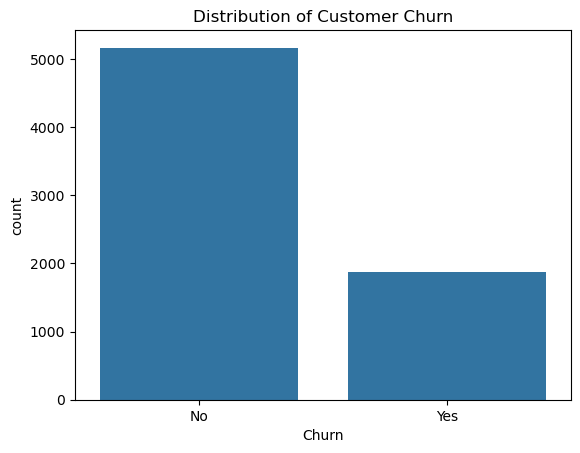

In [17]:
# Distribution of Target variables
sns.countplot(x="Churn",data=df)
plt.title("Distribution of Customer Churn")
plt.show()

In [18]:
df["Churn"].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

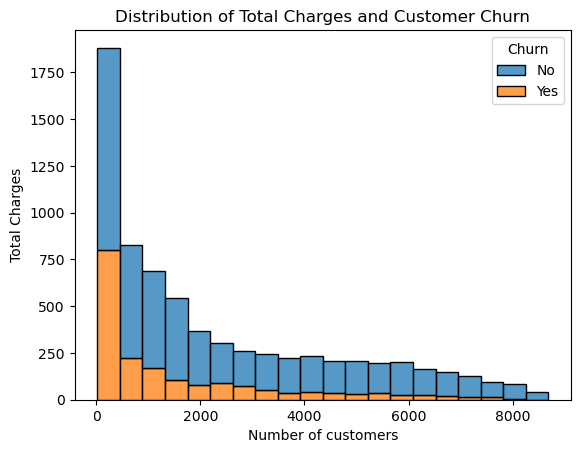

In [19]:
#Distribution of Total charges and customer churn
sns.histplot(x="TotalCharges",data=df,hue="Churn",multiple="stack",bins=20)
plt.title("Distribution of Total Charges and Customer Churn")
plt.xlabel("Number of customers")
plt.ylabel("Total Charges")
plt.show()

From above visual we can understand that when the Total price are low there has been a greater chance of cutomer churn and the Total charges increases there is less drop of chustmoer churn rate and more drastically low at very huge Total Chagres and to increase the churn rate the main focus should be on High Total prices range Clients. 

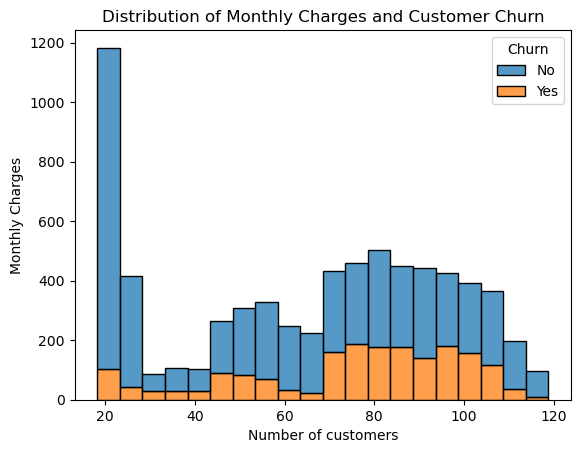

In [21]:
#Distribution of Monthly Charges and Customer Churn
sns.histplot(x="MonthlyCharges",data=df,hue="Churn",multiple="stack",bins=20)
plt.title("Distribution of Monthly Charges and Customer Churn")
plt.xlabel("Number of customers")
plt.ylabel("Monthly Charges")
plt.show()

From above visuals we can see that the Customer Churn rate is high at the moderate Monthly Charges when we move either ways form moderate Monthly charges we can see that there is significant decreasing customer churn majorly when the monthly chareges are low customer churn rate is pretty low the focus should be on this people to increase the customer churn rate.

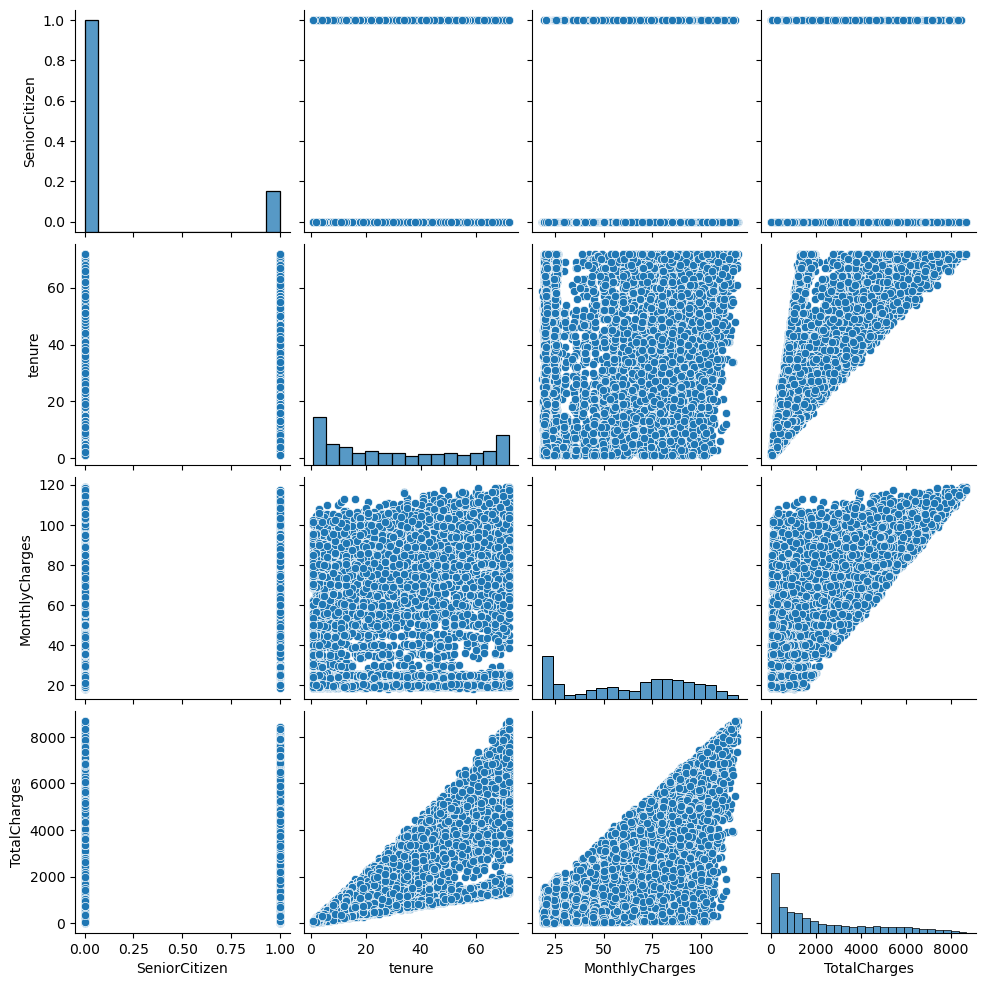

In [23]:
sns.pairplot(data=df)
plt.show()

In [24]:
# Checking for the Corelation 
nums_col = []
for column in df.columns:
    if df[column].dtype != object:
        nums_col.append(column)

nums_col_corr = df[nums_col].corr()

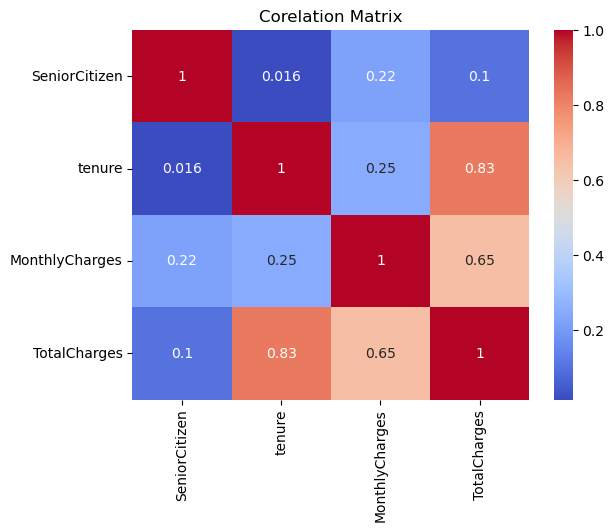

In [25]:
# plotting correlation using heatmap
sns.heatmap(nums_col_corr,cmap="coolwarm",annot=True)
plt.title("Corelation Matrix")
plt.show()

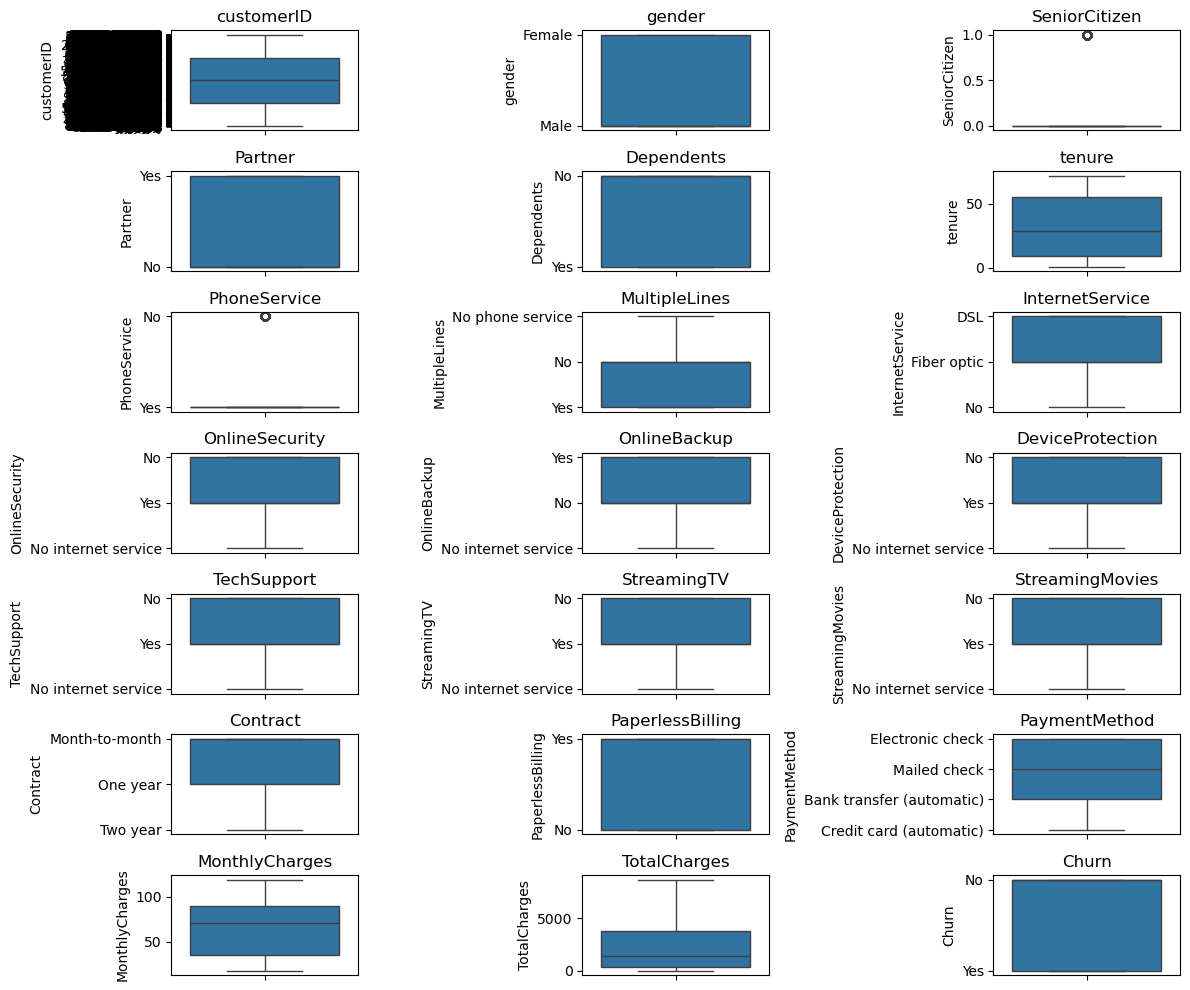

In [26]:
#checking for ouliers in the dataset
plt.figure(figsize=(12,10))
for i,column in enumerate (df.columns):
    plt.subplot(7,3,i+1)
    sns.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

### Data Prepeocessing

When our data is in non numerical format the model unable to identify the non numerical data.<br> So we have to convert the non numercal data to numerical for model understanding.<br>To do this we use encoding from encoding we will use Label_encoder which is most used encoding method

In [29]:
#Laabel Encoding
for column in df.columns:
    le = LabelEncoder()
    df[column]= le.fit_transform(df[column])

In [30]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,2,142,74,0
1,3953,1,0,0,0,33,1,0,0,2,...,2,0,0,0,1,0,3,497,3624,0
2,2558,1,0,0,0,1,1,0,0,2,...,0,0,0,0,0,1,3,435,536,1
3,5524,1,0,0,0,44,0,1,0,2,...,2,2,0,0,1,0,0,266,3570,0
4,6500,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,1,2,728,674,1


### Featuring and Assingning The varibales

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   customerID        7032 non-null   int32
 1   gender            7032 non-null   int32
 2   SeniorCitizen     7032 non-null   int64
 3   Partner           7032 non-null   int32
 4   Dependents        7032 non-null   int32
 5   tenure            7032 non-null   int64
 6   PhoneService      7032 non-null   int32
 7   MultipleLines     7032 non-null   int32
 8   InternetService   7032 non-null   int32
 9   OnlineSecurity    7032 non-null   int32
 10  OnlineBackup      7032 non-null   int32
 11  DeviceProtection  7032 non-null   int32
 12  TechSupport       7032 non-null   int32
 13  StreamingTV       7032 non-null   int32
 14  StreamingMovies   7032 non-null   int32
 15  Contract          7032 non-null   int32
 16  PaperlessBilling  7032 non-null   int32
 17  PaymentMethod     7032 non-null   int3

In [33]:
x= df[["gender","SeniorCitizen","tenure","InternetService","PhoneService","OnlineSecurity","StreamingTV","StreamingMovies"]]
y = df["Churn"]
x.tail()

,gender,SeniorCitizen,tenure,InternetService,PhoneService,OnlineSecurity,StreamingTV,StreamingMovies
7038,1,0,23,0,1,2,2,2
7039,0,0,71,1,1,0,2,2
7040,0,0,10,0,0,2,0,0
7041,1,1,3,1,1,0,0,0
7042,1,0,65,1,1,2,2,2


In [34]:
# Splitting of Training and Testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [35]:
#Feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred = log_reg.predict(x_test)
log_reg_accuracy = accuracy_score(y_test,y_pred)
print(f"{log_reg_accuracy*100:.2f}")

75.55


## KNN algorithum

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test,knn_pred)
print(f"{knn_accuracy*100:.2f}")

76.05


## Decision tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)
dt_accuracy = accuracy_score(y_test,dt_pred)
print(f"{dt_accuracy*100:.2f}")

75.20


## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test,rf_pred)
print(f"{rf_accuracy*100:.2f}")

75.34


## Support Vector Machine

In [49]:
from sklearn.svm import SVC

In [50]:
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
svc_accuracy = accuracy_score(y_test,svc_pred)
print(f"{svc_accuracy*100:.2f}")

78.54


From the above all the model we can see the Both Logistic Regression and Support Vector Machine are giving the best accuracies so we will try to Hypertune the Both the models and see which will be giving Best Accuracies.

### HyperParameter Tunning

In [53]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [ ]:
svc = SVC()
svc_param_grid = {
    'C':[0.01,0.1,1,10,100],
    "kernel" : ['linear', 'poly', 'rbf'],
    "gamma"  : ["scale","auto",0.01,0.1,1]
}

svc_param_search = RandomizedSearchCV(svc,svc_param_grid,cv = 10,scoring = "accuracy")
svc_param_search.fit(x_train,y_train)
svc_parameters = svc_param_search.best_params_
svc_score = svc_param_search.best_score_

print(f"The Best Parameters of SVC is :{svc_parameters} ")
print(f"The Best score of svc is :{svc_score*100:.2f}")

In [ ]:
best_svc = svc_param_search.best_estimator_
svc_predict = best_svc.predict(x_test)
best_svc_accuracy = accuracy_score(y_test,svc_predict)
print(f"The Accuacy score with Best estimators: {best_svc_accuracy*100:.2f}")
print("\n classification Repoert of Support Vector Machine")
print(classification_report(y_test,svc_predict))

In [ ]:
log_reg_param_grid={
    "C" : [0.01,0.1,1,10,100], #Regularization Parameter
    "solver" : ['lbfgs', 'liblinear'], # solver to use
    "max_iter" : [100,200,300,400,500] #maximun number of iterations
}

log_reg_grid_search= GridSearchCV(LogisticRegression(),log_reg_param_grid,cv=10,scoring="accuracy")
log_reg_grid_search.fit(x_train,y_train)
log_reg_params = log_reg_grid_search.best_params_
log_reg_accuracy=log_reg_grid_search.best_score_
print(f"The Logistic Regression Best Parameters:{log_reg_params}")
print(f"The Logistic Regression Best Scores:{log_reg_accuracy*100:.2f}")

best_log_reg = log_reg_grid_search.best_estimator_
log_reg_predict = best_log_reg.predict(x_test)
best_log_reg_accuracy = accuracy_score(y_test,log_reg_predict)

In [ ]:
print(f"The Accuacy score with Best estimators: {best_log_reg_accuracy*100:.2f}")
print("\n classification Repoert of Logistic Regression")
print(classification_report(y_test,log_reg_predict))

In [ ]:
print(f"The Accuacy score with Best estimators: {best_svc_accuracy*100:.2f}")
print("\n classification Repoert of Support Vector Machine")
print(classification_report(y_test,svc_predict))

In [ ]:
cofn_mat_log_reg = confusion_matrix(y_test,log_reg_predict)
sns.heatmap(cofn_mat_log_reg,cmap="coolwarm",annot=True,fmt="d")
plt.show()

In [ ]:
cofn_mat_svc = confusion_matrix(y_test,svc_predict)
sns.heatmap(cofn_mat_svc,cmap="coolwarm",annot=True,fmt="d")
plt.show()

From all Hypertunning of Logistic Regression and SVM model we can see the accurary score of both the model are around 78.04 and 78.11 and precision and recall values are slighly better for logistic regression.So there is no much significant differecne in accuray score of both models so i would prefer the Logistic Regression model because it is simple and give similar accuracy score compared to SVM it is easy to choose a simpler model then complex model the output is nearly same.